In [2]:
from resnet.resnet import resnet50

from PIL import Image
import torch as th
from torchvision import transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
rn50 = resnet50()
rn50.load_state_dict(th.load('./resnet/resnet50.pth'))

<All keys matched successfully>

In [4]:
filename = './resnet/test_images/ostrich.jpg'
# filename = 'balloon.jpeg'
# filename = 'myself.jpg'
# filename = 'dog.jpg'
model = rn50

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


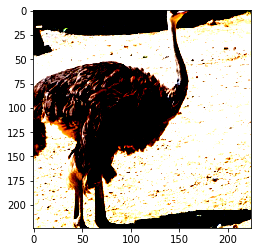

In [5]:
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

with th.no_grad():
    model.eval()
    output = model(input_batch)
# # Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
# print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
output = th.nn.functional.softmax(output[0], dim=0)

plt.imshow(input_batch[0].permute(1,2,0));

In [6]:
out = output.clone()
for i in range(10):
    max_ind = th.argmax(out)
    print('{}: {}'.format(i,max_ind))
    out[max_ind] = 0

0: 9
1: 138
2: 355
3: 354
4: 100
5: 134
6: 276
7: 23
8: 353
9: 127


In [20]:
num = 0
for key in state_dict.keys():
    num += state_dict[key].numel()
print(num)

25610205


In [22]:
num = 0
for key in state_dict.keys():
    print(key)

conv1.weight
bn1.weight
bn1.bias
bn1.running_mean
bn1.running_var
bn1.num_batches_tracked
layer1.0.conv1.weight
layer1.0.bn1.weight
layer1.0.bn1.bias
layer1.0.bn1.running_mean
layer1.0.bn1.running_var
layer1.0.bn1.num_batches_tracked
layer1.0.conv2.weight
layer1.0.bn2.weight
layer1.0.bn2.bias
layer1.0.bn2.running_mean
layer1.0.bn2.running_var
layer1.0.bn2.num_batches_tracked
layer1.0.conv3.weight
layer1.0.bn3.weight
layer1.0.bn3.bias
layer1.0.bn3.running_mean
layer1.0.bn3.running_var
layer1.0.bn3.num_batches_tracked
layer1.0.downsample.0.weight
layer1.0.downsample.1.weight
layer1.0.downsample.1.bias
layer1.0.downsample.1.running_mean
layer1.0.downsample.1.running_var
layer1.0.downsample.1.num_batches_tracked
layer1.1.conv1.weight
layer1.1.bn1.weight
layer1.1.bn1.bias
layer1.1.bn1.running_mean
layer1.1.bn1.running_var
layer1.1.bn1.num_batches_tracked
layer1.1.conv2.weight
layer1.1.bn2.weight
layer1.1.bn2.bias
layer1.1.bn2.running_mean
layer1.1.bn2.running_var
layer1.1.bn2.num_batches_tr

In [22]:
for block in rn50.named_children():
    print(block[0])
    print(type(block[1].state_dict()))
    

conv1
<class 'collections.OrderedDict'>
bn1
<class 'collections.OrderedDict'>
relu
<class 'collections.OrderedDict'>
maxpool
<class 'collections.OrderedDict'>
layer1
<class 'collections.OrderedDict'>
layer2
<class 'collections.OrderedDict'>
layer3
<class 'collections.OrderedDict'>
layer4
<class 'collections.OrderedDict'>
avgpool
<class 'collections.OrderedDict'>
fc
<class 'collections.OrderedDict'>


In [9]:
outs = []
for layer in list(rn50):
    print(layer, end='\n\n\n\n')

TypeError: 'ResNet' object is not iterable

In [47]:
PATH_H36M = './../../cvlabdata2/cvlab/Human36m/OpenPose/'
PATH_H36M_heatmaps = './../../cvlabdata2/cvlab/Human36m/OpenPose/S1/Heatmaps/'

In [3]:
from glob import glob

In [18]:
images = glob(PATH_H36M+'S1/Images/*.jpg')
heatmaps = glob(PATH_H36M_heatmaps+'*.png')

In [21]:
pickle_path = './../../cvlabdata2/cvlab/Human36m/OpenPose/train_data.pkl'

In [22]:
import pickle

In [24]:
with open(pickle_path, 'rb') as f:
    data = pickle.load(f)

In [36]:
one_data = data['Directions'][1]['Directions_1.54138969']['000000']

(1002, 1000, 3)


(700, 200)

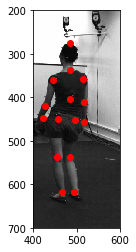

In [73]:
img = plt.imread(images[0])
print(img.shape)
plt.imshow(img.mean(axis=2), cmap='gray')
plt.plot(one_data['annotations_2d'][:,0], one_data['annotations_2d'][:,1], 'ro')
plt.xlim((400,600))
plt.ylim((700,200))

In [42]:
one_data['annotations_2d']

array([[484.965, 275.186],
       [485.001, 337.78 ],
       [515.043, 357.025],
       [517.704, 411.478],
       [517.753, 457.777],
       [446.809, 359.55 ],
       [427.798, 419.532],
       [422.193, 446.878],
       [495.865, 452.356],
       [484.928, 536.777],
       [493.162, 618.396],
       [457.775, 449.61 ],
       [455.083, 536.782],
       [465.968, 618.598],
       [484.896, 403.275]], dtype=float32)

In [45]:
one_data['annotations_3d'].reshape(-1,3)

array([[   0.      ,    0.      ,    0.      ],
       [ 123.76886 ,   11.344116,   47.20117 ],
       [  21.089218,  394.12036 ,  244.9253  ],
       [ 146.8992  ,  827.83307 ,  196.25635 ],
       [-123.76907 ,  -11.344147,  -47.200684],
       [ -81.509705,  420.65765 ,   40.799805],
       [ -32.753586,  869.88245 ,   86.881836],
       [  67.57315 , -208.67953 ,  -79.99121 ],
       [  36.539597, -459.07278 , -129.27686 ],
       [  23.54889 , -565.9275  ,  -73.71631 ],
       [  57.795944, -649.1797  , -145.28271 ],
       [ -82.35919 , -369.085   , -153.28955 ],
       [-193.94012 , -127.55069 ,  -69.70459 ],
       [-285.55585 ,   30.219147,  103.745605],
       [ 156.97043 , -395.86948 ,  -63.609375],
       [ 212.52238 , -149.09631 ,   53.856445],
       [ 190.62325 ,   41.19568 ,  217.18652 ]], dtype=float32)

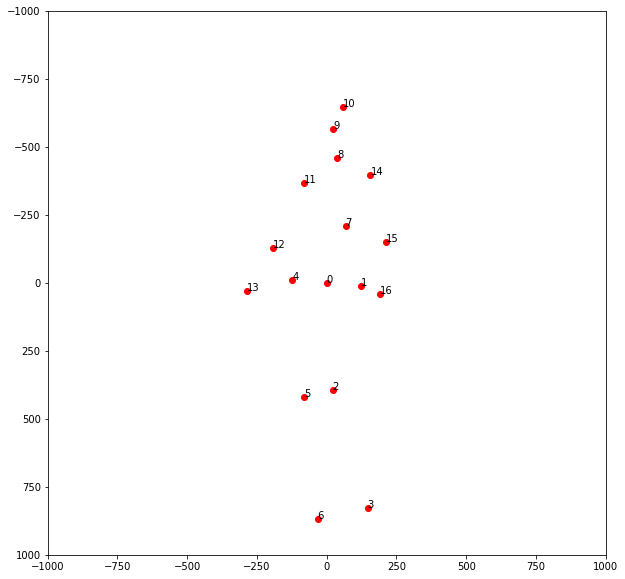

In [86]:

_3d_ = one_data['annotations_3d'].reshape(-1,3)
x_, y_, z_ = _3d_[:,0], _3d_[:,1], _3d_[:,2] 
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.set_xlim((-1000,1000))
ax.set_ylim((1000,-1000))

ax.plot(x_,y_, 'ro')
for i in range(len(_3d_)):
#     print(_3d_[i])
    plt.annotate(i, (_3d_[i,0], _3d_[i,1]))

In [54]:
one_data['annotations_3d'].shape

(51,)

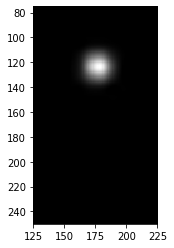

In [108]:
heatmap = plt.imread(PATH_H36M+one_data['heatmap_path'])
heatmap = heatmap.reshape(368,15,368)
plt.imshow(heatmap.sum(axis=1), cmap='gray')
plt.imshow(heatmap[:,1,:], cmap='gray')
plt.xlim((125,225))
plt.ylim((250,75));


In [44]:
one_data

{'annotations_3d': array([   0.      ,    0.      ,    0.      ,  123.76886 ,   11.344116,
          47.20117 ,   21.089218,  394.12036 ,  244.9253  ,  146.8992  ,
         827.83307 ,  196.25635 , -123.76907 ,  -11.344147,  -47.200684,
         -81.509705,  420.65765 ,   40.799805,  -32.753586,  869.88245 ,
          86.881836,   67.57315 , -208.67953 ,  -79.99121 ,   36.539597,
        -459.07278 , -129.27686 ,   23.54889 , -565.9275  ,  -73.71631 ,
          57.795944, -649.1797  , -145.28271 ,  -82.35919 , -369.085   ,
        -153.28955 , -193.94012 , -127.55069 ,  -69.70459 , -285.55585 ,
          30.219147,  103.745605,  156.97043 , -395.86948 ,  -63.609375,
         212.52238 , -149.09631 ,   53.856445,  190.62325 ,   41.19568 ,
         217.18652 ], dtype=float32),
 'annotations_2d': array([[484.965, 275.186],
        [485.001, 337.78 ],
        [515.043, 357.025],
        [517.704, 411.478],
        [517.753, 457.777],
        [446.809, 359.55 ],
        [427.798, 419.532],


In [5]:
import matplotlib.pyplot as plt

(1002, 1000, 3)


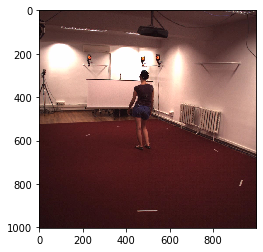

In [7]:
plt.imshow(plt.imread(images[0]))
print(plt.imread(images[0]).shape)